# Initial Matrix with missing enteries

In [1]:
import pandas as pd
import numpy as np

ratingsNames = ["userId", "movieId", "rating", "timestamp"]
usersNames = ["userId", "gender", "age", "occupation", "zipCode"]
moviesNames = ["movieId", "title", "genres"]

#ratings = pd.read_table("simple-exp/rating1.dat", header=None, sep="::", names=ratingsNames)
#users = pd.read_table("simple-exp/user1.dat", header=None, sep="::", names=usersNames)
#movies = pd.read_table("simple-exp/mov1.dat", header=None, sep="::", names=moviesNames)

#ratings = pd.read_table("ml-1m/ratings.dat", header=None, sep="::", names=ratingsNames)
#users = pd.read_table("ml-1m/users.dat", header=None, sep="::", names=usersNames)
#movies = pd.read_table("ml-1m/movies.dat", header=None, sep="::", names=moviesNames)

ratings = pd.read_table("D:/RCS/ml-1L_1/ml-1L/ratings.csv", header=None, sep=",", names=ratingsNames)

ratingsMatrix = ratings.pivot_table(columns=['movieId'], index =['userId'], values='rating', dropna = False)

ratingsMatrix = ratingsMatrix.fillna(0).values  #ratingsMatrix.fillna(0).as_matrix() deprecated


print("Rating Matrix:\n",ratingsMatrix) 

Rating Matrix:
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


# SVD

In [2]:
import pandas as pd
import numpy as np

ratings_list = [i.strip().split("::") for i in open('D:/RCS/ml-1m_1/ml-1m/ratings.dat', 'r').readlines()]
users_list = [i.strip().split("::") for i in open('D:/RCS/ml-1m_1/ml-1m/users.dat', 'r').readlines()]
movies_list = [i.strip().split("::") for i in open('D:/RCS/ml-1m_1/ml-1m/movies.dat', 'r').readlines()]

ratings_df = pd.DataFrame(ratings_list, columns = ['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype = int)
movies_df = pd.DataFrame(movies_list, columns = ['MovieID', 'Title', 'Genres'])

In [3]:
movies_df.head()
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
R_df = ratings_df.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
R_df.head()

MovieID,1,10,100,1000,1002,1003,1004,1005,1006,1007,...,99,990,991,992,993,994,996,997,998,999
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import numpy
numpy.set_printoptions(suppress=False)
R = R_df.to_numpy()
print(R)
#position = numpy.where(R == 0)[0]
#pos = list(zip(*np.nonzero(R)))
pos = np.transpose(np.nonzero(R))
user_ratings_mean = np.mean(R.astype(int), axis = 1)
print(user_ratings_mean)
R_demeaned = R.astype(int) - user_ratings_mean.reshape(-1, 1)

[['5' 0 0 ... 0 0 0]
 ['5' 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 ['4' 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0.05990286 0.44522396 0.06206152 ... 0.03184026 0.15002698 0.35429034]


In [6]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)

In [7]:
sigma = np.diag(sigma)

In [8]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)

print(all_user_predicted_ratings)
prediction_rounded = np.round(all_user_predicted_ratings, 2)
print(prediction_rounded)

[[ 4.28886061e+00 -1.95949954e-01  5.97905159e-02 ...  3.69448331e-02
   6.05339706e-02  5.07522018e-02]
 [ 4.51691241e+00  9.42799641e-01 -1.85102236e-01 ... -1.14662683e-01
  -1.53838225e-01 -2.73472961e-01]
 [-7.85461022e-02  9.07656597e-01 -1.24355693e-02 ...  2.40143123e-02
  -1.50433388e-03 -2.77038221e-02]
 ...
 [ 2.51096600e+00 -7.73346045e-03 -9.30083673e-02 ...  2.92685658e-02
  -1.09956651e-02 -2.10282212e-01]
 [ 1.96157517e+00 -3.36833956e-01  1.24358241e-02 ...  1.70794645e-01
   5.40658314e-02 -1.75652918e-01]
 [ 1.32156042e-01  2.83102525e+00  9.24648755e-01 ... -3.50771301e-02
   5.57506501e-01  4.92852217e-01]]
[[ 4.29 -0.2   0.06 ...  0.04  0.06  0.05]
 [ 4.52  0.94 -0.19 ... -0.11 -0.15 -0.27]
 [-0.08  0.91 -0.01 ...  0.02 -0.   -0.03]
 ...
 [ 2.51 -0.01 -0.09 ...  0.03 -0.01 -0.21]
 [ 1.96 -0.34  0.01 ...  0.17  0.05 -0.18]
 [ 0.13  2.83  0.92 ... -0.04  0.56  0.49]]


# CONVEX OPTIMIZATION

In [9]:
import pandas as pd
import numpy as np

ratingsNames = ["userId", "movieId", "rating", "timestamp"]
usersNames = ["userId", "gender", "age", "occupation", "zipCode"]
moviesNames = ["movieId", "title", "genres"]

ratings = pd.read_table("D:/RCS/simple-exp-50/simple-exp-50/rating1.dat", header=None, sep="::", names=ratingsNames)
users = pd.read_table("D:/RCS/simple-exp-50/simple-exp-50/user1.dat", header=None, sep="::", names=usersNames)
movies = pd.read_table("D:/RCS/simple-exp-50/simple-exp-50/mov1.dat", header=None, sep="::", names=moviesNames)

#ratings = pd.read_table("ml-1m/ratings.dat", header=None, sep="::", names=ratingsNames)
#users = pd.read_table("ml-1m/users.dat", header=None, sep="::", names=usersNames)
#movies = pd.read_table("ml-1m/movies.dat", header=None, sep="::", names=moviesNames)

#ratings = pd.read_table("ml-1L/ratings.csv", header=None, sep=",", names=ratingsNames)

ratingsMatrix = ratings.pivot_table(columns=['movieId'], index =['userId'], values='rating', dropna = False)

ratingsMatrix = ratingsMatrix.fillna(0).values  #ratingsMatrix.fillna(0).as_matrix() deprecated

#ratingsMatrix = abs(ratingsMatrix)



<ipython-input-9-b9dbb2dba82a>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table("D:/RCS/simple-exp-50/simple-exp-50/rating1.dat", header=None, sep="::", names=ratingsNames)
<ipython-input-9-b9dbb2dba82a>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table("D:/RCS/simple-exp-50/simple-exp-50/user1.dat", header=None, sep="::", names=usersNames)
<ipython-input-9-b9dbb2dba82a>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you ca

In [10]:
print("Rating Matrix:\n",ratingsMatrix) 

Rating Matrix:
 [[5 2 2 5 2 2 3 1 0 5]
 [0 2 5 3 3 6 0 3 5 4]
 [4 4 5 0 4 4 5 4 0 4]
 [5 4 0 3 5 0 4 5 3 5]
 [3 4 4 4 4 0 3 5 4 4]]


In [11]:
import random
import math
import itertools
from cvxpy import *

def _solve(M, omega):
    n_1 = M.shape[0]
    n_2 = M.shape[1]
    X_ = Variable((n_1 + n_2, n_1 + n_2), PSD=True)
    objective = Minimize(trace(X_))
    constraints=[]
    for i, j in omega:
        constr = (X_[i, j + n_1] == M[i, j])
        constraints.append(constr)
    problem = Problem(objective, constraints)
    problem.solve(solver=CVXOPT)

    X0 = X_.value
    return X_.value[:n_1, n_1:]


def _get_mask_matrix(n_1, n_2, omega):
    """
    If we observed entry (i, j) of matrix M, the entry of mask matrix is 1,
    Otherwise 0.
    """
    mask = np.zeros((n_1, n_2), dtype=np.int8)
    for i, j in omega:
        mask[i, j] = 1
    return mask


def _get_abs_max_from_matrix(M):
    return np.max(np.absolute(M))

def main(n_1, n_2):
    print("#row of M    :", n_1)
    print("#column of M :", n_2)
    M = ratingsMatrix
    print("M\n",M)
    M_abs_max = _get_abs_max_from_matrix(M)
    print("|M|_*        :", np.linalg.norm(M, "nuc"))
    M_rank = np.linalg.matrix_rank(M)
    print("RANK of M    :", M_rank)
   
    omega = np.transpose(np.nonzero(ratingsMatrix))
    mask = _get_mask_matrix(n_1, n_2, omega)

    M_ = M.copy()
    np.place(M_, 1 - mask, M_abs_max * M_abs_max)
    X = _solve(M_, omega)
    print("Output matrix X\n",X)
    prediction_rounded = np.round(X, 3)
    print(prediction_rounded)
    X = X.round(decimals=0,out=None)
    print("After rounding X\n",X)
    X_rank = np.linalg.matrix_rank(X)
    print("RANK of X    :", X_rank)
    print("|X|_*        :", np.linalg.norm(X, "nuc"))

if __name__ == '__main__':

    p = 0.8
    n_1 = ratingsMatrix.shape[0]
    n_2 = ratingsMatrix.shape[1]
    
    main(n_1, n_2)


#row of M    : 5
#column of M : 10
M
 [[5 2 2 5 2 2 3 1 0 5]
 [0 2 5 3 3 6 0 3 5 4]
 [4 4 5 0 4 4 5 4 0 4]
 [5 4 0 3 5 0 4 5 3 5]
 [3 4 4 4 4 0 3 5 4 4]]
|M|_*        : 44.66433654896476
RANK of M    : 5
Output matrix X
 [[5.         2.         2.         5.         2.         2.
  3.         1.         2.11405979 5.        ]
 [2.89118536 2.         5.         3.         3.         6.
  3.52788915 3.         5.         4.        ]
 [4.         4.         5.         3.07475708 4.         4.
  5.         4.         3.62605359 4.        ]
 [5.         4.         4.02390003 3.         5.         3.15031426
  4.         5.         3.         5.        ]
 [3.         4.         4.         4.         4.         3.55791689
  3.         5.         4.         4.        ]]
[[5.    2.    2.    5.    2.    2.    3.    1.    2.114 5.   ]
 [2.891 2.    5.    3.    3.    6.    3.528 3.    5.    4.   ]
 [4.    4.    5.    3.075 4.    4.    5.    4.    3.626 4.   ]
 [5.    4.    4.024 3.    5.    3.15  

# NMF

In [1]:
import pandas as pd
import numpy as np

ratingsNames = ["userId", "movieId", "rating", "timestamp"]
usersNames = ["userId", "gender", "age", "occupation", "zipCode"]
moviesNames = ["movieId", "title", "genres"]

#ratings = pd.read_table("simple-exp/rating1.dat", header=None, sep="::", names=ratingsNames)
#users = pd.read_table("simple-exp/user1.dat", header=None, sep="::", names=usersNames)
#movies = pd.read_table("simple-exp/mov1.dat", header=None, sep="::", names=moviesNames)

#ratings = pd.read_table("ml-1m/ratings.dat", header=None, sep="::", names=ratingsNames)
#users = pd.read_table("ml-1m/users.dat", header=None, sep="::", names=usersNames)
#movies = pd.read_table("ml-1m/movies.dat", header=None, sep="::", names=moviesNames)

ratings = pd.read_table("D:/RCS/ml-1L_1/ml-1L/ratings.csv", header=None, sep=",", names=ratingsNames)

ratingsMatrix = ratings.pivot_table(columns=['movieId'], index =['userId'], values='rating', dropna = False)

ratingsMatrix = ratingsMatrix.fillna(0).values  #ratingsMatrix.fillna(0).as_matrix() deprecated



print("Rating Matrix:\n",ratingsMatrix) 
print(ratingsMatrix.shape)

Rating Matrix:
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
(943, 1682)


In [2]:
K = 3
M=943
N=1682
#M = 5
#N = 10
W = np.abs(np.random.uniform(low=0, high=6, size=(M, K)))
H = np.abs(np.random.uniform(low=0, high=6, size=(K, N)))
W = np.divide(W, K*W.max())
H = np.divide(H, K*H.max())

In [3]:
pd.DataFrame(W).head()
pd.DataFrame(H).head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.034300,0.017932,0.213954,0.110663,0.206030,0.238177,0.167598,0.287674,0.120902,0.265311,...,0.170003,0.109148,0.113117,0.165535,0.065695,0.079072,0.027016,0.219867,0.287233,0.234151
1,0.157213,0.232127,0.243930,0.095776,0.093042,0.261709,0.000273,0.316511,0.182870,0.092575,...,0.280832,0.299816,0.105586,0.280843,0.171986,0.263104,0.095136,0.269477,0.054159,0.012566
2,0.009780,0.330839,0.083603,0.210421,0.084729,0.174853,0.192945,0.149711,0.049144,0.032896,...,0.168974,0.237087,0.314376,0.200045,0.125124,0.000013,0.068548,0.073004,0.159150,0.325379


In [4]:
def cost(ratingsMatrix, W, H):
    from numpy import linalg
    WH = np.dot(W, H)
    A_WH = ratingsMatrix-WH
    return linalg.norm(A_WH, 'fro')

In [5]:
cost(ratingsMatrix, W, H)

1152.2745753138902

In [6]:
def cost(ratingsMatrix, W, H):
    from numpy import linalg
    mask = pd.DataFrame(ratingsMatrix).notnull().values
    WH = np.dot(W, H)
    WH_mask = WH[mask]
    A_mask = ratingsMatrix[mask]
    A_WH_mask = A_mask-WH_mask
    # Since now A_WH_mask is a vector, we use L2 instead of Frobenius norm for matrix
    return linalg.norm(A_WH_mask, 2)

In [7]:
cost(ratingsMatrix, W, H)

1152.2745753138902

In [10]:
num_iter = 50
num_display_cost = max(int(num_iter/10), 1)
print(num_display_cost)
from scipy.optimize import nnls

for i in range(num_iter):
    if i%2 ==0:
        # Learn H, given A and W
        for j in range(N):
            mask_rows = pd.Series(ratingsMatrix[:,j]).notnull()
            H[:,j] = nnls(W[mask_rows], ratingsMatrix[:,j][mask_rows])[0]
    else:
        for j in range(M):
            mask_rows = pd.Series(ratingsMatrix[j,:]).notnull()
            W[j,:] = nnls(H.transpose()[mask_rows], ratingsMatrix[j,:][mask_rows])[0]
    WH = np.dot(W, H)
  ##  c = cost(ratingsMatrix, W, H)
  ##  if i%num_display_cost==0:
      ##  print (i, c)
print(ratingsMatrix)
A_pred = pd.DataFrame(np.dot(W, H))
pred = A_pred.to_numpy()
print(pred)
prediction_rounded = np.round(pred, 2)
print(prediction_rounded)

5
[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
[[3.83715158e+00 1.74334778e+00 8.35833932e-01 ... 3.23064409e-03
  1.60573571e-02 1.51345718e-02]
 [2.01223716e+00 0.00000000e+00 4.42233079e-01 ... 8.58562902e-03
  8.76727822e-05 1.91998487e-04]
 [9.71407498e-01 0.00000000e+00 2.16933089e-01 ... 4.21159591e-03
  0.00000000e+00 0.00000000e+00]
 ...
 [9.33317462e-01 9.12590690e-02 2.14409558e-01 ... 3.48227766e-03
  7.53503672e-04 6.01612563e-04]
 [1.26617702e+00 1.65297077e-01 2.01777508e-01 ... 2.68509097e-03
  2.49285512e-03 3.56003745e-03]
 [2.84390032e+00 1.90885770e+00 7.50997887e-01 ... 3.49757643e-04
  1.58744381e-02 1.28323682e-02]]
[[3.84 1.74 0.84 ... 0.   0.02 0.02]
 [2.01 0.   0.44 ... 0.01 0.   0.  ]
 [0.97 0.   0.22 ... 0.   0.   0.  ]
 ...
 [0.93 0.09 0.21 ... 0.   0.   0.  ]
 [1.27 0.17 0.2  ... 0.   0.   0.  ]
 [2.84 1.91 0.75 ... 0.   0.02 0.01]]


# ALS

In [11]:
import pandas as pd
import numpy as np

ratingsNames = ["userId", "movieId", "rating", "timestamp"]
usersNames = ["userId", "gender", "age", "occupation", "zipCode"]
moviesNames = ["movieId", "title", "genres"]

#ratings = pd.read_table("simple-exp-50/rating1.dat", header=None, sep="::", names=ratingsNames)
#users = pd.read_table("simple-exp-50/user1.dat", header=None, sep="::", names=usersNames)
#movies = pd.read_table("simple-exp-50/mov1.dat", header=None, sep="::", names=moviesNames)

#ratings = pd.read_table("ml-1m/ratings.dat", header=None, sep="::", names=ratingsNames)
#users = pd.read_table("ml-1m/users.dat", header=None, sep="::", names=usersNames)
#movies = pd.read_table("ml-1m/movies.dat", header=None, sep="::", names=moviesNames)

ratings = pd.read_table("D:/RCS/ml-1L_1/ml-1L/ratings.csv", header=None, sep=",", names=ratingsNames)

ratingsMatrix = ratings.pivot_table(columns=['movieId'], index =['userId'], values='rating', dropna = False)

ratingsMatrix = ratingsMatrix.fillna(0).values  #ratingsMatrix.fillna(0).as_matrix() deprecated

A = ratingsMatrix
print("A",A.shape)
R = A>0.5;
R[R == True] = 1; 
R[R == False] = 0;
R = R.astype(np.float64, copy=False)

print("A",A)
print("R",R)
 
def runALS(A, R, n_factors, n_iterations, lambda_):
    '''
    Runs Alternating Least Squares algorithm in order to calculate matrix.
    :param A: User-Item Matrix with ratings
    :param R: User-Item Matrix with 1 if there is a rating or 0 if not
    :param n_factors: How many factors each of user and item matrix will consider
    :param n_iterations: How many times to run algorithm
    :param lambda_: Regularization parameter
    :return:
    '''
    lambda_ = 0.1; n_factors = 3; n, m = A.shape; n_iterations = 20
    Users = 5 * np.random.rand(n, n_factors)
    print("Users",Users)
    Items = 5 * np.random.rand(n_factors, m)

    def get_error(A, Users, Items, R):
        # This calculates the MSE of nonzero elements
        return np.sum((R * (A - np.dot(Users, Items))) ** 2) / np.sum(R)

    MSE_List = []

    print("Starting Iterations")
    for iter in range(n_iterations):
        for i, Ri in enumerate(R):
            Users[i] = np.linalg.solve(np.dot(Items, np.dot(np.diag(Ri), Items.T)) + lambda_ * np.eye(n_factors),
                                       np.dot(Items, np.dot(np.diag(Ri), A[i].T))).T

        ##print("Error after solving for User Matrix:", get_error(A, Users, Items, R))

        for j, Rj in enumerate(R.T):
            Items[:,j] = np.linalg.solve(np.dot(Users.T, np.dot(np.diag(Rj), Users)) + lambda_ * np.eye(n_factors),
                                     np.dot(Users.T, np.dot(np.diag(Rj), A[:, j])))
        ##print("Error after solving for Item Matrix:", get_error(A, Users, Items, R))

        MSE_List.append(get_error(A, Users, Items, R))
        ##print('%sth iteration is complete...' %  iter)
    out = np.dot(Items.T, Users.T).T;
    print("Out",out)
    return out
    


A (943, 1682)
A [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
R [[1. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
out = runALS(A, R, n_factors = 5, n_iterations = 20, lambda_ = .5)

Users [[1.8538838  3.74711472 2.26257205]
 [4.69382727 4.21483993 3.98177679]
 [4.18194243 1.36363021 4.1269493 ]
 ...
 [1.62159779 0.72805396 1.41485173]
 [2.71337743 2.55734365 0.47036371]
 [1.9476997  0.27024697 2.44338958]]
Starting Iterations
Out [[3.92175418 3.07173139 2.86529095 ... 1.43666554 2.73236619 2.72955766]
 [3.99040578 2.98080737 1.98282505 ... 1.83145035 3.20027172 2.41112663]
 [3.1341972  2.62919585 2.86917573 ... 0.87306751 1.80208604 2.18873577]
 ...
 [4.40146301 3.52489398 2.94344735 ... 1.65585263 3.01826238 2.64450555]
 [4.54826983 3.89549722 3.08946527 ... 1.55979377 2.74647603 2.11120398]
 [3.76429679 3.46607443 4.21021292 ... 0.64347595 1.54907659 2.43421194]]


In [13]:
prediction_rounded = np.round(out,3)
print(prediction_rounded)

[[3.922 3.072 2.865 ... 1.437 2.732 2.73 ]
 [3.99  2.981 1.983 ... 1.831 3.2   2.411]
 [3.134 2.629 2.869 ... 0.873 1.802 2.189]
 ...
 [4.401 3.525 2.943 ... 1.656 3.018 2.645]
 [4.548 3.895 3.089 ... 1.56  2.746 2.111]
 [3.764 3.466 4.21  ... 0.643 1.549 2.434]]


# JL lemma plots

In [14]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
johnson_lindenstrauss_min_dim(n_samples=1e6, eps=0.5)

johnson_lindenstrauss_min_dim(n_samples=1e6, eps=[0.5, 0.1, 0.01])

johnson_lindenstrauss_min_dim(n_samples=[1e4, 1e5, 1e6], eps=0.1)

array([ 7894,  9868, 11841])

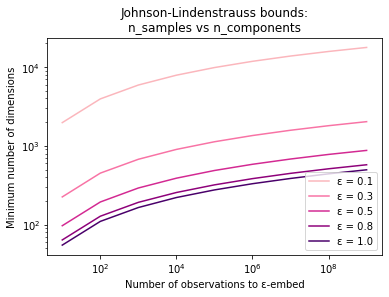

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# range of admissible distortions
eps_range = np.linspace(0.1, 0.99, 5)
colors = plt.cm.RdPu(np.linspace(0.3, 1.0, len(eps_range)))

# range of number of samples (observation) to embed
n_samples_range = np.logspace(1, 9, 9)

plt.figure()
for eps, color in zip(eps_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(n_samples_range, eps=eps)
    plt.loglog(n_samples_range, min_n_components, color=color)

plt.legend(["ε = %0.1f" % eps for eps in eps_range], loc="lower right")
plt.xlabel("Number of observations to ε-embed")
plt.ylabel("Minimum number of dimensions")
plt.title("Johnson-Lindenstrauss bounds:\nn_samples vs n_components")
plt.savefig("eps.pdf")

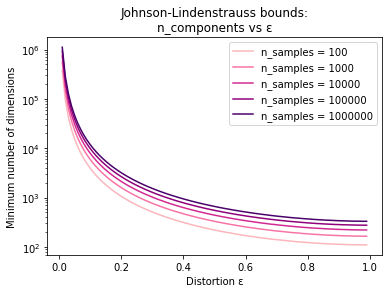

In [16]:
# range of admissible distortions
eps_range = np.linspace(0.01, 0.99, 100)

# range of number of samples (observation) to embed
n_samples_range = np.logspace(2, 6, 5)
colors = plt.cm.RdPu(np.linspace(0.3, 1.0, len(n_samples_range)))

plt.figure()
for n_samples, color in zip(n_samples_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(n_samples, eps=eps_range)
    plt.semilogy(eps_range, min_n_components, color=color)

plt.legend(["n_samples = %d" % n for n in n_samples_range], loc="upper right")
plt.xlabel("Distortion ε")
plt.ylabel("Minimum number of dimensions")
plt.title("Johnson-Lindenstrauss bounds:\nn_components vs ε")
#plt.show()
plt.savefig("samples.pdf")

# Random Projection

In [17]:
import numpy as np
from sklearn import random_projection
X = out
transformer = random_projection.SparseRandomProjection(eps=0.3)
X_new = transformer.fit_transform(X)
print("X",X)
print("X_new",X_new)
print(X.shape)
print(X_new.shape)
prediction_rounded = np.round(X_new,3)
print(prediction_rounded)


X [[3.92175418 3.07173139 2.86529095 ... 1.43666554 2.73236619 2.72955766]
 [3.99040578 2.98080737 1.98282505 ... 1.83145035 3.20027172 2.41112663]
 [3.1341972  2.62919585 2.86917573 ... 0.87306751 1.80208604 2.18873577]
 ...
 [4.40146301 3.52489398 2.94344735 ... 1.65585263 3.01826238 2.64450555]
 [4.54826983 3.89549722 3.08946527 ... 1.55979377 2.74647603 2.11120398]
 [3.76429679 3.46607443 4.21021292 ... 0.64347595 1.54907659 2.43421194]]
X_new [[ -3.12994528  -0.20705599 -11.45303639 ...   5.4335804    8.65045751
   -2.25708696]
 [ -3.15595455  -0.03759626 -10.93174373 ...   4.82417463   7.50758298
   -0.89074252]
 [ -2.7920327   -0.11555496  -9.010523   ...   4.35585283   7.42681705
   -2.6942195 ]
 ...
 [ -3.89095584   0.04127044 -11.80581904 ...   5.29134629   8.91906181
   -2.1469965 ]
 [ -4.8155242    0.49164869 -10.51809025 ...   4.27027462   8.43827854
   -2.34066079]
 [ -3.98976975   0.07310118 -10.08586849 ...   4.85581332   9.32798082
   -4.42643811]]
(943, 1682)
(943, 76